# Map-based simulation for elliptical beam convolution

## Here, we introduce how to assess elliptical beam systematics by the map-based simulation in the case of a single detector on the boresight.


In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from sbm import Field, ScanFields, SignalFields
import sbm
import sys
sys.version

'3.10.15 | packaged by conda-forge | (main, Oct 16 2024, 01:24:24) [GCC 13.3.0]'

# Load the cross-link on the boresight detector

## Input map: CMB (r=0)


In [2]:
scan_field = ScanFields.load_det("boresight/boresight", base_path="/data/t/t541/program/map-based/crosslink_maps/crosslinks_2411_nside_512_1yr_hwp_39rpm/")
r = 0.0
nside = 512
fwhm = np.deg2rad(3.0)
fiducial_map = sbm.generate_cmb(nside, r, cmb_seed=12345)
alm = hp.map2alm(fiducial_map)
smooth_alm = hp.smoothalm(alm,fwhm, inplace=False)
smooth_map = hp.alm2map(smooth_alm,nside)

# Make a elliptical beam

In [3]:
q = 1
beam = sbm.elliptical_beam(nside, fwhm, q)
blm = hp.map2alm(beam)

In [4]:
mdim = 3
signal_field = sbm.SignalFields.elliptical_beam_convolution(scan_field, mdim, alm, blm)

# Solve the liner system

Here, we perform the map-making by 3x3 matrix.

In [5]:
scan_field.xlink_threshold = 1
output_map = scan_field.map_make(signal_field)
residual = smooth_map - output_map

# Let's check the Input/Output/Residual maps

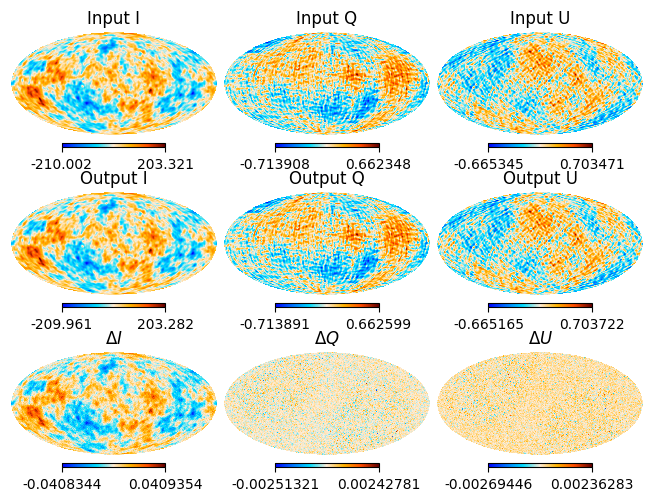

In [6]:
cmap = sbm.get_cmap()
hp.mollview(smooth_map[0], title="Input I", sub=(3,3,1), cmap=cmap)
hp.mollview(smooth_map[1], title="Input Q", sub=(3,3,2), cmap=cmap)
hp.mollview(smooth_map[2], title="Input U", sub=(3,3,3), cmap=cmap)

# SBM does not reconstruct I if `only_iqu`` is True
hp.mollview(output_map[0], title="Output I", sub=(3,3,4), cmap=cmap)
hp.mollview(output_map[1], title="Output Q", sub=(3,3,5), cmap=cmap)
hp.mollview(output_map[2], title="Output U", sub=(3,3,6), cmap=cmap)

hp.mollview(residual[0], title="$\Delta I$", sub=(3,3,7), cmap=cmap)
hp.mollview(residual[1], title="$\Delta Q$", sub=(3,3,8), cmap=cmap)
hp.mollview(residual[2], title="$\Delta U$", sub=(3,3,9), cmap=cmap)